# Milestone 4



## A. Introduction

In this milestone, I analyze numerical variables from the dataset using measures of **central tendency** (mean, median, mode) and **dispersion** (variance, standard deviation). These statistics help summarize the typical value of a variable and how spread out the observations are.

(Extra analyses like confidence intervals/correlation appear later in the notebook, but the main focus for Milestone 4 is central tendency, dispersion, and supporting visualizations.)


## B. Dataset

I used the cleaned dataset from previous milestones.
Dataset used here: `2025-08-10.csv`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

DATA_PATH = r"2025-08-10.csv"
df = pd.read_csv(DATA_PATH)
print('Loaded:', DATA_PATH)
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())

df.head(10)

Loaded: 2025-08-10.csv
Shape: (64, 18)
Columns: ['date', 'district', 'division', 'lat', 'lon', 'temp_c', 'humidity', 'pressure', 'wind_speed', 'clouds', 'rain', 'aqi', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']


,date,district,division,lat,lon,temp_c,humidity,pressure,wind_speed,clouds,rain,aqi,pm2_5,pm10,o3,no2,so2,co
0,2025-08-10,Bagerhat,Khulna,22.655478,89.794181,32.00,63,1006,3.94,100,0.0,1,1.43,3.24,40.23,0.13,0.18,98.31
1,2025-08-10,Bandarban,Chattogram,21.787476,92.412475,33.56,54,1006,1.09,96,0.0,1,0.94,1.48,31.99,0.04,0.02,79.80
2,2025-08-10,Barguna,Barishal,22.131336,90.117243,31.90,65,1006,5.18,100,0.0,1,1.10,2.93,33.37,0.03,0.09,85.17
3,2025-08-10,Barishal,Barishal,22.493403,90.354801,33.42,55,1006,5.08,100,0.0,1,0.99,2.44,34.83,0.04,0.07,85.93
4,2025-08-10,Bhola,Barishal,22.143569,90.790409,29.38,77,1007,4.41,98,0.0,1,0.51,1.29,32.46,0.02,0.03,82.80
5,2025-08-10,Bogura,Rajshahi,24.850066,89.372843,33.94,57,1004,4.17,84,0.0,3,30.62,34.07,66.92,8.73,11.25,293.51
6,2025-08-10,Brahmanbaria,Chattogram,23.960600,91.119089,33.06,66,1006,4.12,75,0.0,1,1.23,2.12,32.13,1.03,0.42,109.33
7,2025-08-10,Chandpur,Chattogram,23.224176,90.653100,32.58,61,1006,4.26,98,0.0,1,0.67,1.39,33.11,0.34,0.27,89.17
8,2025-08-10,Chapai Nawabganj,Rajshahi,24.599887,88.285047,35.13,52,1004,4.03,76,0.0,3,35.50,38.31,79.41,7.30,15.25,304.89
9,2025-08-10,Chattogram,Chattogram,22.333778,91.834435,31.93,66,1007,4.12,40,0.0,1,0.61,1.18,29.40,0.03,0.02,79.32


In [2]:
# Helper functions for Milestone 4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

def _mode_str(series, max_modes=3):
    s = series.dropna()
    if len(s) == 0:
        return np.nan
    modes = s.mode()
    if modes.empty:
        return np.nan
    modes = modes.iloc[:max_modes].tolist()
    parts = []
    for m in modes:
        try:
            parts.append(str(float(m)))
        except Exception:
            parts.append(str(m))
    return ", ".join(parts)

def descriptive_stats(series):
    s = series.dropna().astype(float)
    if len(s) == 0:
        return {}
    return {
        'count': int(s.count()),
        'mean': float(s.mean()),
        'median': float(s.median()),
        'mode': _mode_str(s),
        'std': float(s.std(ddof=1)),
        'var': float(s.var(ddof=1)),
        'min': float(s.min()),
        'max': float(s.max()),
        'skew': float(s.skew()),
        'kurtosis': float(s.kurtosis()),
        '25%': float(s.quantile(0.25)),
        '50%': float(s.quantile(0.5)),
        '75%': float(s.quantile(0.75))
    }

def plot_hist_with_lines(series, title=None, bins=15):
    s = series.dropna().astype(float)
    if len(s) == 0:
        print('No data to plot.')
        return

    mean_val = float(s.mean())
    median_val = float(s.median())
    mode_vals = s.mode()
    mode_val = float(mode_vals.iloc[0]) if not mode_vals.empty else None

    plt.figure(figsize=(7, 4))
    plt.hist(s, bins=bins, edgecolor='white', alpha=0.8)
    plt.axvline(mean_val, color='red', linestyle='-', linewidth=2, label=f"Mean: {mean_val:.2f}")
    plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:.2f}")
    if mode_val is not None:
        plt.axvline(mode_val, color='blue', linestyle=':', linewidth=2, label=f"Mode: {mode_val:.2f}")
    if title:
        plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

def conf_int_mean(series, alpha=0.05):
    s = series.dropna().astype(float)
    n = len(s)
    if n==0:
        return (None, None, n)
    mean = s.mean()
    se = s.sem()
    dfree = n-1
    t = stats.t.ppf(1-alpha/2, dfree)
    lower = mean - t*se
    upper = mean + t*se
    return (float(lower), float(upper), n)

def one_sample_ttest(series, popmean=0):
    s = series.dropna().astype(float)
    if len(s)==0:
        return None
    tstat, pval = stats.ttest_1samp(s, popmean)
    return (float(tstat), float(pval), int(len(s)))

def paired_ttest(series1, series2):
    s1 = series1.dropna().astype(float)
    s2 = series2.dropna().astype(float)
    # align indices
    dfp = pd.concat([s1, s2], axis=1).dropna()
    if dfp.shape[0]==0:
        return None
    tstat, pval = stats.ttest_rel(dfp.iloc[:,0], dfp.iloc[:,1])
    return (float(tstat), float(pval), int(dfp.shape[0]))

def corr_matrix(df, cols):
    return df[cols].select_dtypes(include=[np.number]).corr()

def plot_box(series, title=None):
    s = series.dropna().astype(float)
    if len(s)==0:
        print('No data to plot.')
        return
    plt.figure(figsize=(6,3))
    plt.boxplot(s, vert=False)
    if title: plt.title(title)
    plt.show()

def plot_scatter(x, y, title=None, xlabel=None, ylabel=None):
    x1 = x.dropna().astype(float)
    y1 = y.dropna().astype(float)
    dfp = pd.concat([x1, y1], axis=1).dropna()
    if dfp.shape[0]==0:
        print('Not enough paired data to plot.')
        return
    plt.figure(figsize=(6,4))
    plt.scatter(dfp.iloc[:,0], dfp.iloc[:,1])
    if title: plt.title(title)
    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()


## C. Task 1: Descriptive Statistics

**Chosen numerical columns (at least two):**
- `temp_c` (temperature in Celsius): directly reflects weather conditions and varies by location.
- `humidity` (%): an important atmospheric indicator that also varies across districts.

These two variables are meaningful, numeric, and measured in different units, so comparing their central tendency and dispersion is informative.


In [3]:
rows = []
for col in ['temp_c', 'humidity', 'wind_speed', 'rain']:
    if col in df.columns:
        col_stats = descriptive_stats(df[col])
        if col_stats:
            col_stats['column'] = col
            rows.append(col_stats)

if rows:
    summary = pd.DataFrame(rows).set_index('column')
    display(summary)
    summary.to_csv('descriptive_summary.csv')
    print('Saved: descriptive_summary.csv')

    # Task 1 (Central Tendency): mean, median, mode comparison
    chosen_cols = [c for c in ['temp_c', 'humidity'] if c in summary.index]
    if chosen_cols:
        ct = summary.loc[chosen_cols, ['mean', 'median', 'mode', 'skew']].copy()
        display(ct)

        for c in chosen_cols:
            mean_val = summary.loc[c, 'mean']
            median_val = summary.loc[c, 'median']
            skew_val = summary.loc[c, 'skew']
            if mean_val > median_val:
                shape = 'right-skewed (mean > median)'
            elif mean_val < median_val:
                shape = 'left-skewed (mean < median)'
            else:
                shape = 'approximately symmetric (mean ≈ median)'
            print(f"{c}: mean={mean_val:.2f}, median={median_val:.2f}, mode={summary.loc[c, 'mode']}, skew={skew_val:.3f} -> {shape}")
    else:
        print('Chosen columns not found in summary for central tendency comparison.')
else:
    print('No numeric stats computed. Check column names.')


,count,mean,median,mode,std,var,min,max,skew,kurtosis,25%,50%,75%
column,,,,,,,,,,,,,
temp_c,64,32.337344,32.325,"32.01, 33.42",1.206887,1.456575,28.54,35.13,-0.912929,1.924521,31.8600,32.325,33.145
humidity,64,63.656250,63.000,"59.0, 70.0",6.264586,39.245040,52.00,82.00,0.560908,0.389585,59.0000,63.000,68.250
wind_speed,64,4.016406,4.160,4.12,1.033174,1.067449,0.46,5.31,-1.390653,1.987592,3.8025,4.160,4.675
rain,64,0.000000,0.000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0000,0.000,0.000


Saved: descriptive_summary.csv


,mean,median,mode,skew
column,,,,
temp_c,32.337344,32.325,"32.01, 33.42",-0.912929
humidity,63.656250,63.000,"59.0, 70.0",0.560908


temp_c: mean=32.34, median=32.33, mode=32.01, 33.42, skew=-0.913 -> right-skewed (mean > median)
humidity: mean=63.66, median=63.00, mode=59.0, 70.0, skew=0.561 -> right-skewed (mean > median)


### Interpretation (Central Tendency)

- I compare mean, median, and mode for `temp_c` and `humidity` using the table printed above.
- If the **mean is greater than the median**, the distribution tends to be **right-skewed** (a longer right tail). If the **mean is less than the median**, it tends to be **left-skewed**.
- The **mode** represents the most frequently occurring value(s). If mean/median/mode are very different, it suggests skewness or possible outliers.


## D. Task 2: Measures of Dispersion + (Optional) Visualization

This section computes **variance** and **standard deviation** for the chosen numeric columns and interprets which variable is more/less variable.

Optional (encouraged): I also plot **histograms** with vertical lines for mean, median, and mode to visually compare central tendency and see dispersion.

(Additional boxplots/scatterplots are included below as supporting visualizations.)


,count,mean,variance (s^2),std dev (s)
column,,,,
temp_c,64,32.337344,1.456575,1.206887
humidity,64,63.656250,39.245040,6.264586


Most variable (largest std dev): humidity
Most consistent (smallest std dev): temp_c


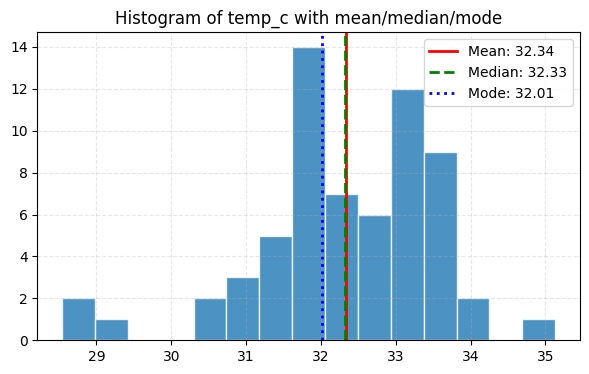

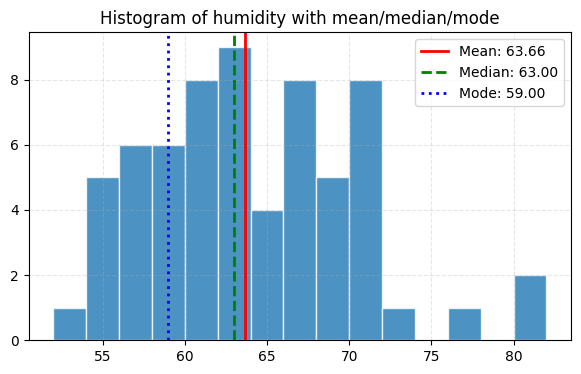

In [4]:
# Task 2 (Dispersion): variance and standard deviation for chosen columns
chosen_cols = ['temp_c', 'humidity']
rows = []
for col in chosen_cols:
    if col in df.columns:
        s = df[col].dropna().astype(float)
        rows.append({
            'column': col,
            'count': int(s.count()),
            'mean': float(s.mean()),
            'variance (s^2)': float(s.var(ddof=1)),
            'std dev (s)': float(s.std(ddof=1)),
        })

if rows:
    disp_tbl = pd.DataFrame(rows).set_index('column')
    display(disp_tbl)

    most_variable = disp_tbl['std dev (s)'].idxmax()
    least_variable = disp_tbl['std dev (s)'].idxmin()
    print(f"Most variable (largest std dev): {most_variable}")
    print(f"Most consistent (smallest std dev): {least_variable}")
else:
    print('Chosen columns not found for dispersion calculations.')

# Optional visualization: histograms with mean/median/mode lines
for col in chosen_cols:
    if col in df.columns:
        plot_hist_with_lines(df[col], title=f'Histogram of {col} with mean/median/mode')


### Interpretation (Dispersion + Histogram)

- The **variance** and **standard deviation** tables show how spread out the values are around the mean.
- The column with the **larger standard deviation** is more variable (less consistent), while a **smaller standard deviation** indicates more consistency.
- In the histogram, a **wider** distribution indicates greater dispersion; a **narrower** distribution indicates less dispersion.
- The vertical lines help compare mean/median/mode visually and see skewness (e.g., mean pulled toward the tail).


Boxplot for temp_c


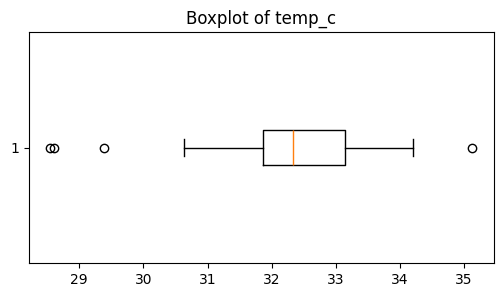

In [5]:
# Boxplot for: temp_c
col = "temp_c"
if col in df.columns:
    print('Boxplot for', col)
    plot_box(df[col], title=f'Boxplot of {col}')
else:
    print('Column not found:', col)


Boxplot for humidity


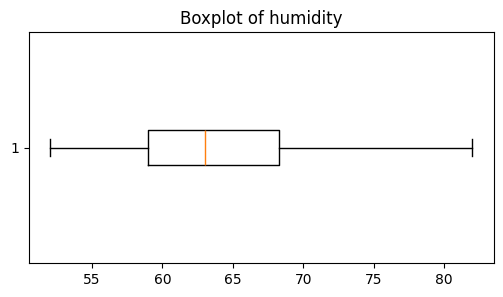

In [6]:
# Boxplot for: humidity
col = "humidity"
if col in df.columns:
    print('Boxplot for', col)
    plot_box(df[col], title=f'Boxplot of {col}')
else:
    print('Column not found:', col)


Boxplot for wind_speed


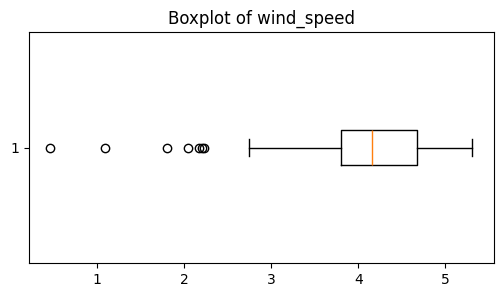

In [7]:
# Boxplot for: wind_speed
col = "wind_speed"
if col in df.columns:
    print('Boxplot for', col)
    plot_box(df[col], title=f'Boxplot of {col}')
else:
    print('Column not found:', col)


Boxplot for rain


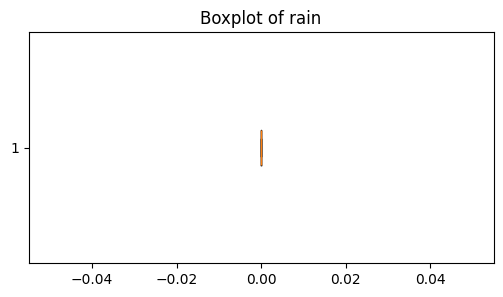

In [8]:
# Boxplot for: rain
col = "rain"
if col in df.columns:
    print('Boxplot for', col)
    plot_box(df[col], title=f'Boxplot of {col}')
else:
    print('Column not found:', col)


Scatter: temp_c vs humidity


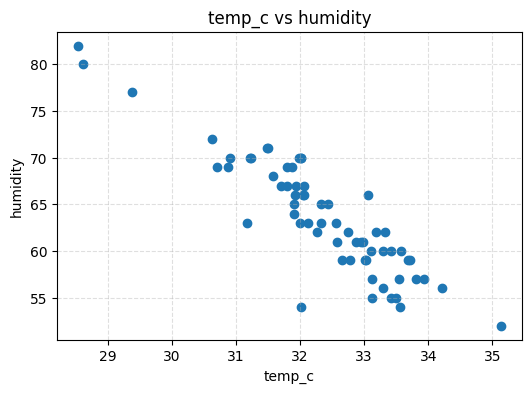

In [9]:
# Scatter: temp_c vs humidity
xcol = "temp_c"; ycol = "humidity"
if xcol in df.columns and ycol in df.columns:
    print('Scatter:', xcol, 'vs', ycol)
    plot_scatter(df[xcol], df[ycol], title=f'{xcol} vs {ycol}', xlabel=xcol, ylabel=ycol)
else:
    print('Columns not found for scatter:', xcol, ycol)


Scatter: temp_c vs wind_speed


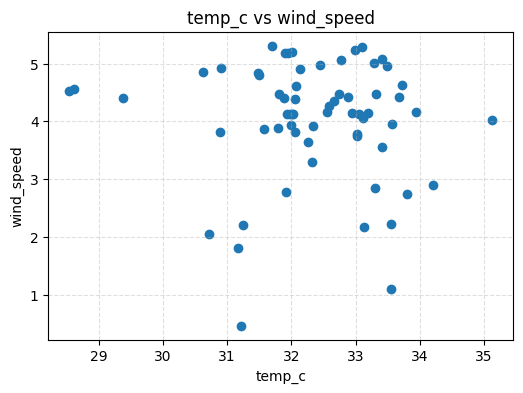

In [10]:
# Scatter: temp_c vs wind_speed
xcol = "temp_c"; ycol = "wind_speed"
if xcol in df.columns and ycol in df.columns:
    print('Scatter:', xcol, 'vs', ycol)
    plot_scatter(df[xcol], df[ycol], title=f'{xcol} vs {ycol}', xlabel=xcol, ylabel=ycol)
else:
    print('Columns not found for scatter:', xcol, ycol)


## E. Task 3: Inferential Statistics

This section computes 95% confidence intervals for means and performs one-sample t-tests.


In [11]:
# Inferential stats for: temp_c
col = "temp_c"
if col in df.columns:
    lower, upper, n = conf_int_mean(df[col], alpha=0.05)
    print('95% CI for mean of {}:'.format(col), lower, upper, '(n=' + str(n) + ')')
    popmean = round(df[col].dropna().mean(), 2) if col in df.columns else 0
    res = one_sample_ttest(df[col], popmean=popmean)
    if res is not None:
        tstat, pval, nn = res
        print('One-sample t-test of mean == {}: t={}, p={}, n={}'.format(popmean, round(tstat,3), round(pval,4), nn))
    else:
        print('T-test not performed for', col)
else:
    print('Column not found:', col)


95% CI for mean of temp_c: 32.035872436075735 32.63881506392427 (n=64)
One-sample t-test of mean == 32.34: t=-0.018, p=0.986, n=64


In [12]:
# Inferential stats for: humidity
col = "humidity"
if col in df.columns:
    lower, upper, n = conf_int_mean(df[col], alpha=0.05)
    print('95% CI for mean of {}:'.format(col), lower, upper, '(n=' + str(n) + ')')
    popmean = round(df[col].dropna().mean(), 2) if col in df.columns else 0
    res = one_sample_ttest(df[col], popmean=popmean)
    if res is not None:
        tstat, pval, nn = res
        print('One-sample t-test of mean == {}: t={}, p={}, n={}'.format(popmean, round(tstat,3), round(pval,4), nn))
    else:
        print('T-test not performed for', col)
else:
    print('Column not found:', col)


95% CI for mean of humidity: 62.09140293826054 65.22109706173946 (n=64)
One-sample t-test of mean == 63.66: t=-0.005, p=0.9962, n=64


In [13]:
# Inferential stats for: wind_speed
col = "wind_speed"
if col in df.columns:
    lower, upper, n = conf_int_mean(df[col], alpha=0.05)
    print('95% CI for mean of {}:'.format(col), lower, upper, '(n=' + str(n) + ')')
    popmean = round(df[col].dropna().mean(), 2) if col in df.columns else 0
    res = one_sample_ttest(df[col], popmean=popmean)
    if res is not None:
        tstat, pval, nn = res
        print('One-sample t-test of mean == {}: t={}, p={}, n={}'.format(popmean, round(tstat,3), round(pval,4), nn))
    else:
        print('T-test not performed for', col)
else:
    print('Column not found:', col)


95% CI for mean of wind_speed: 3.7583270308470467 4.274485469152954 (n=64)
One-sample t-test of mean == 4.02: t=-0.028, p=0.9779, n=64


In [14]:
# Inferential stats for: rain
col = "rain"
if col in df.columns:
    lower, upper, n = conf_int_mean(df[col], alpha=0.05)
    print('95% CI for mean of {}:'.format(col), lower, upper, '(n=' + str(n) + ')')
    popmean = round(df[col].dropna().mean(), 2) if col in df.columns else 0
    res = one_sample_ttest(df[col], popmean=popmean)
    if res is not None:
        tstat, pval, nn = res
        print('One-sample t-test of mean == {}: t={}, p={}, n={}'.format(popmean, round(tstat,3), round(pval,4), nn))
    else:
        print('T-test not performed for', col)
else:
    print('Column not found:', col)


95% CI for mean of rain: 0.0 0.0 (n=64)
One-sample t-test of mean == 0.0: t=nan, p=nan, n=64


### Paired t-test example

Two paired measures for the same units, used paired_ttest().

In [15]:
# Paired t-test example: edit columns if needed
col1 = 'temp_c'
col2 = 'temp_c'  # change to paired column
if col1 in df.columns and col2 in df.columns:
    res = paired_ttest(df[col1], df[col2])
    print('Paired t-test result (t, p, n):', res)
else:
    print('Paired columns not found or identical; edit names in cell.')


Paired t-test result (t, p, n): (nan, nan, 64)


### Correlation and simple linear regression

This cell computes correlation matrix and fits a simple linear regression (OLS) for temp_c ~ humidity if possible.


In [16]:
# Correlation matrix
cols = ['temp_c', 'humidity', 'wind_speed', 'rain']
nums = [c for c in cols if c in df.columns]
if nums:
    cm = corr_matrix(df, nums)
    print('Correlation matrix:')
    display(cm)
else:
    print('No numeric columns for correlation.')

if 'temp_c' in df.columns and 'humidity' in df.columns:
    import statsmodels.api as sm
    df_reg = df[['temp_c','humidity']].dropna()
    X = sm.add_constant(df_reg['humidity'])
    y = df_reg['temp_c']
    model = sm.OLS(y, X).fit()
    print(model.summary())
else:
    print('Cannot run regression: temp_c or humidity missing.')


Correlation matrix:


,temp_c,humidity,wind_speed,rain
temp_c,1.000000,-0.896305,-0.053559,NaN
humidity,-0.896305,1.000000,0.108080,NaN
wind_speed,-0.053559,0.108080,1.000000,NaN
rain,NaN,NaN,NaN,NaN


                            OLS Regression Results                            
Dep. Variable:                 temp_c   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     253.3
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           1.42e-23
Time:                        17:38:52   Log-Likelihood:                -50.298
No. Observations:                  64   AIC:                             104.6
Df Residuals:                      62   BIC:                             108.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.3292      0.694     62.441      0.0

## F. Task 4: Analysis and Conclusion

**Central tendency:**
- I compare the mean, median, and mode for `temp_c` and `humidity` to understand the “typical” values.
- When the mean is larger than the median, it often suggests a right-skewed distribution; when the mean is smaller, it suggests a left-skew.

**Spread and variability:**
- I compare the standard deviations (and variances) to decide which variable is more consistent (smaller spread) and which is more variable (larger spread).

**Interesting observations / conclusion:**
- After reviewing the tables and histograms, I summarize how the distributions behave and which variable shows greater variability.

(Notes/limitations: a very small sample size or outliers can affect the mean and standard deviation.)


## G. Submission